# Validaciones - Clasificadores

#### Tablas 2010 - Personas - Total Pais

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - Total Pais

- Poblacion por CONDACT y AGLOMERADO 
    - ***Comparacion INDEC***
- Poblacion por CAT OCUP y AGLOMERADO
- Poblacion por CAT INAC y AGLOMERADO

- Poblacion por CONDACT y PROV
    - ***Comparacion INDEC***
- Poblacion por CAT OCUP y PROV
    - ***Comparacion INDEC***
- Poblacion por CAT INAC y PROV

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - Total Pais

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS

#### Tablas 2010 - Personas - Total Pais

- Poblacion por Ingreso y AGLOMERADO
- Poblacion por Ingreso JUB y AGLOMERADO
- Poblacion por Ingreso y PROV
- Poblacion por Ingreso JUB y PROV

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS


#### Tablas 2010 - Personas - Total Pais

- Poblacion por Informalidad (PP07K)

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por Informalidad (PP07K)

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por Informalidad (PP07K)

In [1]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
from numpy import array, nan

def load_spreadsheet(key, worksheet = 0):

    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']

    credentials = ServiceAccountCredentials.from_json_keyfile_name(
             './../../../Desktop/fourth-stock-325317-605e9494d4f6.json', scope) # Your json file here

    gc = gspread.authorize(credentials)

    wks = gc.open_by_key(key).get_worksheet(worksheet)

    data = array(wks.get_all_values())

#     # 1 line header
# #     header_0 = pd.Series(data[0, 1:]).replace('', nan).fillna(method = 'pad').values
    
#     # 2 lines header
#     header_0 = pd.Series(data[0, 2:]).replace('', nan).fillna(method = 'pad').values
#     header_1 = array(data[1, 2:])
#     header = pd.MultiIndex.from_arrays([header_0, header_1]) #zip(header_0, header_1)
    
#     index_0 = pd.Series(data[1:, 0]).replace('', nan).fillna(method = 'pad').values
    
#     sheet = pd.DataFrame(data[1:, 1:], columns=header_0, index = index_0)

    return data


## Carga de archivos 'pobreza'

- Controlar path donde ubicar estos archivos. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01
# path ='./data/RFReg_' # use your path
# path ='./../data/Pobreza/pobreza_' # use your path
path ='/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
allFiles = allFiles#[40:50]

In [3]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')
condact_labels = pd.read_csv('./../data/info/condact_labels.csv')
cat_inac_labels = pd.read_csv('./../data/info/cat_inac_labels.csv')
cat_ocup_labels = pd.read_csv('./../data/info/cat_ocup_labels.csv')
PP07K_labels = pd.read_csv('./../data/info/pp07k_labels.csv')

In [4]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
    vars_ = ['CONDACT', 'CAT_OCUP', 'CAT_INAC']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-11-15.csv
/media/mig

## Cantidad Personas (2010) Por Condicion de ocupacion

### Total Pais

In [5]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### CONDACT

,Cantidad,Porcentaje
CONDACT,,
0,9770600.0,24.4
1,18507575.0,46.3
2,1323725.0,3.3
3,10368500.0,25.9
TOTAL,39970400.0,99.9


### CAT_OCUP

,Cantidad,Porcentaje
CAT_OCUP,,
0.0,20058800.0,50.2
1.0,1400.0,0.0
2.0,456525.0,1.1
3.0,19449275.0,48.7
4.0,4400.0,0.0
TOTAL,39970400.0,100.0


### CAT_INAC

,Cantidad,Porcentaje
CAT_INAC,,
0.0,20158000.0,50.4
1.0,3871500.0,9.7
2.0,100.0,0.0
3.0,8301600.0,20.8
4.0,3116000.0,7.8
5.0,4029200.0,10.1
6.0,34200.0,0.1
7.0,459800.0,1.2
TOTAL,39970400.0,100.1


### 31 Aglomerados

In [6]:
data = df10.loc[df10.AGLO_si == 1]

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### CONDACT

,Cantidad,Porcentaje
CONDACT,,
0,5808600.0,23.0
1,12346275.0,49.0
2,936325.0,3.7
3,6124300.0,24.3
TOTAL,25215500.0,100.0


### CAT_OCUP

,Cantidad,Porcentaje
CAT_OCUP,,
0.0,11895550.0,47.2
1.0,1300.0,0.0
2.0,242825.0,1.0
3.0,13073825.0,51.8
4.0,2000.0,0.0
TOTAL,25215500.0,100.0


### CAT_INAC

,Cantidad,Porcentaje
CAT_INAC,,
0.0,13451600.0,53.3
1.0,2359100.0,9.4
3.0,4981500.0,19.8
4.0,1722200.0,6.8
5.0,2454800.0,9.7
6.0,19100.0,0.1
7.0,227200.0,0.9
TOTAL,25215500.0,100.0


## Cantidad de Personas, por Aglomerado

In [7]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMAGLO', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### CONDACT

CONDACT,0,1,2,3
NOMAGLO,,,,
Bahia Blanca,59500.0,138600.0,10200.0,79000.0
CABA,477200.0,1645300.0,87200.0,666100.0
Catamarca,48800.0,79725.0,9575.0,45000.0
Cdro Rivadavia,33000.0,78000.0,4200.0,37600.0
Concordia,43000.0,70525.0,3475.0,37900.0
Cordoba,326100.0,701975.0,65625.0,363800.0
Corrientes,82300.0,153550.0,14950.0,100500.0
Formosa,61400.0,94775.0,5025.0,64100.0
Fuera de aglom.,3962000.0,6161300.0,387400.0,4244200.0


### CAT_OCUP

CAT_OCUP,0.0,1.0,2.0,3.0,4.0
NOMAGLO,,,,,
Bahia Blanca,138500.0,0.0,4700.0,144100.0,0.0
CABA,1135725.0,500.0,25125.0,1714250.0,200.0
Catamarca,93900.0,0.0,1700.0,87400.0,100.0
Cdro Rivadavia,70825.0,0.0,1100.0,80875.0,0.0
Concordia,80900.0,0.0,1500.0,72500.0,0.0
Cordoba,689700.0,100.0,13700.0,754000.0,0.0
Corrientes,183325.0,0.0,3325.0,164450.0,200.0
Formosa,125925.0,0.0,1600.0,97775.0,0.0
Fuera de aglom.,8163250.0,100.0,213700.0,6375450.0,2400.0


### CAT_INAC

CAT_INAC,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
NOMAGLO,,,,,,,,
Bahia Blanca,150000.0,31500.0,0.0,58300.0,19300.0,26000.0,100.0,2100.0
CABA,1765400.0,365600.0,0.0,409600.0,118900.0,202100.0,1000.0,13200.0
Catamarca,89400.0,11400.0,0.0,48300.0,12800.0,19200.0,200.0,1800.0
Cdro Rivadavia,82200.0,11100.0,0.0,28300.0,13800.0,16200.0,200.0,1000.0
Concordia,74000.0,13300.0,0.0,34800.0,12600.0,18000.0,200.0,2000.0
Cordoba,774400.0,131800.0,0.0,301000.0,92900.0,141100.0,1500.0,14800.0
Corrientes,168500.0,27400.0,0.0,89100.0,28000.0,31400.0,0.0,6900.0
Formosa,99800.0,17600.0,0.0,58400.0,19400.0,25800.0,100.0,4200.0
Fuera de aglom.,6706400.0,1512400.0,100.0,3320100.0,1393800.0,1574400.0,15100.0,232600.0


In [8]:
### Personas por CONDACT y AGLOMERADO. Comparacion INDEC

datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=2)

df_ = pd.DataFrame(datos)
## Set index
df_ = df_.set_index([0, 1, 2, 3])

## Set header
df_, df_.columns = df_[2:] , df_.iloc[1]
df_.columns.name = 'CONDACT'

df_.index.names = ['AGLO_ID', 'AGLOMERADO','NOMAGLO','Q']
df_ = df_.astype(int)
# df_.head()

# ### Data MI
# data = df10; col = 'CONDACT'
# tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
# tabla = tabla.unstack()
# tabla = tabla.fillna(0)
# tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

In [9]:
# info = pd.concat([df_.sum(), tabla.sum()], axis = 1).dropna()#.sum()

# fig, axs = plt.subplots(1, figsize = (5, 4))

# info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = axs)

# plt.plot([1e6, 2.5e7], [1e6, 2.5e7], lw = 1, linestyle = '--', c = '.5')
# axs.set_xscale('log'); axs.set_yscale('log'); 
# axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
# plt.show()


In [10]:
# info = pd.concat([df_[1], tabla[1]], axis = 1).dropna()#.sum()
# info.columns = ['INDEC', 'MI']
# fig, axs = plt.subplots(1, figsize = (5, 4))

# info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = axs)

# plt.plot([1e5, 1e7], [1e5, 1e7], lw = 1, linestyle = '--', c = '.5')
# axs.set_xscale('log'); axs.set_yscale('log'); 
# axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
# plt.show()


## Cantidad de Personas, por Provincia

In [11]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
#     tabla.at[(99, 'TOTAL')] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### CONDACT

,CONDACT,0,1,2,3
PROV,NOMPROV,,,,
2,Ciudad Autónoma de Buenos Aires,477200.0,1645800.0,87200.0,666100.0
6,Buenos Aires,3683800.0,7541750.0,552650.0,3768500.0
10,Catamarca,102600.0,151300.0,15200.0,104700.0
14,Córdoba,780000.0,1530225.0,114175.0,883200.0
18,Corrientes,270800.0,375125.0,28275.0,324500.0
22,Chaco,299600.0,413425.0,27675.0,319600.0
26,Chubut,122300.0,240250.0,16950.0,113600.0
30,Entre Ríos,319600.0,545475.0,31025.0,350800.0
34,Formosa,157500.0,203325.0,10875.0,162300.0


### CAT_OCUP

,CAT_OCUP,0.0,1.0,2.0,3.0,4.0
PROV,NOMPROV,,,,,
2,Ciudad Autónoma de Buenos Aires,1135725.0,500.0,25125.0,1714750.0,200.0
6,Buenos Aires,7436425.0,500.0,183000.0,7926375.0,400.0
10,Catamarca,206800.0,0.0,4400.0,162500.0,100.0
14,Córdoba,1654700.0,100.0,38150.0,1614550.0,100.0
18,Corrientes,595850.0,0.0,10400.0,392150.0,300.0
22,Chaco,618700.0,0.0,15275.0,425925.0,400.0
26,Chubut,236025.0,0.0,4400.0,252675.0,0.0
30,Entre Ríos,666700.0,0.0,14850.0,565250.0,100.0
34,Formosa,319225.0,0.0,9050.0,205725.0,0.0


### CAT_INAC

,CAT_INAC,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
PROV,NOMPROV,,,,,,,,
2,Ciudad Autónoma de Buenos Aires,1765900.0,365600.0,0.0,409600.0,118900.0,202100.0,1000.0,13200.0
6,Buenos Aires,8192200.0,1512400.0,0.0,3033700.0,1124900.0,1547700.0,12600.0,123200.0
10,Catamarca,167700.0,29400.0,0.0,96000.0,31000.0,41400.0,300.0,8000.0
14,Córdoba,1693100.0,349800.0,100.0,674800.0,242700.0,312000.0,2800.0,32300.0
18,Corrientes,404700.0,94700.0,0.0,253900.0,112200.0,107200.0,1500.0,24500.0
22,Chaco,445100.0,88400.0,0.0,270300.0,111200.0,115500.0,1500.0,28300.0
26,Chubut,261500.0,34500.0,0.0,102400.0,37000.0,52800.0,600.0,4300.0
30,Entre Ríos,586600.0,131400.0,0.0,278300.0,108900.0,125000.0,1200.0,15500.0
34,Formosa,216600.0,44300.0,0.0,144000.0,55000.0,61800.0,600.0,11700.0


### Personas por CAT OCUP y PROVINCIA. Comparacion INDEC

In [12]:
### Data INDEC

datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=0)

df_ = pd.DataFrame(datos)
## Set index
df_ = df_.set_index([0, 1])

## Set header
df_, df_.columns = df_[2:] , df_.iloc[0].astype(int)
df_.columns.name = 'CAT_OCUP'

df_.index.names = ['PROV', 'NOMPROV']

df_ = df_.astype(int)


### Data MI
data = df10; col = 'CAT_OCUP'
tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
tabla = tabla.unstack()
tabla = tabla.fillna(0)
tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

In [13]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

#### Por CAT OCUP

,INDEC,MI
Cat. Ocupado,,
Empleado,12833173,19449275.0
Patrón,1228011,1400.0
Cuenta Propia,3437630,456525.0
Familiar,577932,4400.0
Inactivo,22035352,20058800.0


INDEC    40112098.0
MI       39970400.0
dtype: float64

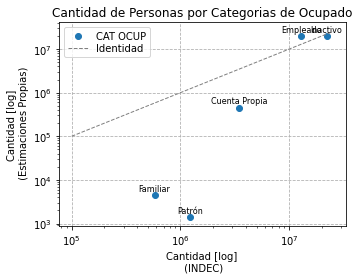

In [14]:
info = pd.concat([df_.sum(), tabla.sum()], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
## Cambiar codigos por nombres
info = info.reset_index().merge(cat_ocup_labels).set_index('Cat. Ocupado')[info.columns]

display(info)

display(info.sum())

fig, ax = plt.subplots(1, figsize = (5, 4))

info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = ax)
ax.plot([1e5, 2.5e7], [1e5, 2.5e7], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.iterrows():
    ax.annotate(i, (row[0], row[1]*1.1), ha = 'center', va = 'bottom', fontsize = 8)

## Plot Format
ax.set_title('Cantidad de Personas por Categorias de Ocupado')
ax.grid(linestyle = '--') # Grid
ax.set_xscale('log'); ax.set_yscale('log'); # Escala Log
# Formatos de ejes X, Y
ax.set_xlabel('Cantidad [log]\n (INDEC)'); ax.set_ylabel('Cantidad [log]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='CAT OCUP')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/clasificadores1.png')
plt.show()

#### Empleados por PROVINCIA

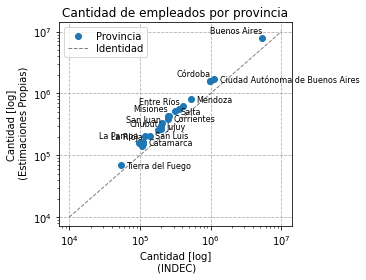

In [15]:
info = pd.concat([df_[3], tabla[3]], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
info.index = info.index.droplevel(0)

fig, ax = plt.subplots(1, figsize = (5, 4))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = ax)

ax.plot([1e4, 1e7], [1e4, 1e7], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.sort_values('INDEC')[1::3].iterrows():
    ax.annotate(i, (row[0], row[1]*1.1), ha = 'right', va = 'bottom', fontsize = 8)
for i, row in info.sort_values('INDEC')[::3].iterrows():
    ax.annotate(i, (row[0]*1.2, row[1]/1.2), ha = 'left', va = 'bottom', fontsize = 8)

## Plot Format
ax.set_title('Cantidad de empleados por provincia')
ax.grid(linestyle = '--') # Grid
ax.set_xscale('log'); ax.set_yscale('log'); # Escala Log
# Formatos de ejes X, Y
ax.set_xlabel('Cantidad [log]\n (INDEC)'); ax.set_ylabel('Cantidad [log]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Provincia')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/clasificadores2.png')
plt.show()

### Personas por CONDACT y PROVINCIA. Comparacion INDEC

In [16]:
datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=1)

df_ = pd.DataFrame(datos)
## Set index
df_ = df_.set_index([0, 1])

## Set header
df_, df_.columns = df_[2:] , df_.iloc[0].astype(int)
df_.columns.name = 'CONDACT'

df_.index.names = ['PROV', 'NOMPROV']
df_ = df_.astype(int)

### Data MI
data = df10; col = 'CONDACT'
tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
tabla = tabla.unstack()
tabla = tabla.fillna(0)
tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

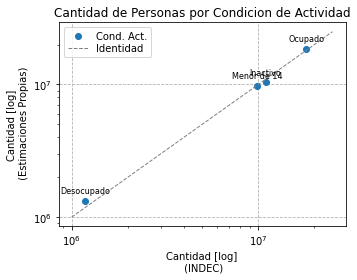

In [17]:
info = pd.concat([df_.sum(), tabla.sum()], axis = 1).dropna()#.sum()
## Cambiar codigos por nombres
info = info.reset_index().merge(condact_labels).set_index('Actividad')[info.columns]

fig, ax = plt.subplots(1, figsize = (5, 4))

info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = ax)

ax.plot([1e6, 2.5e7], [1e6, 2.5e7], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.iterrows():
    ax.annotate(i, (row[0], row[1]*1.1), ha = 'center', va = 'bottom', fontsize = 8)

## Plot Format
ax.set_title('Cantidad de Personas por Condicion de Actividad')
ax.grid(linestyle = '--') # Grid
ax.set_xscale('log'); ax.set_yscale('log'); # Escala Log
# Formatos de ejes X, Y
ax.set_xlabel('Cantidad [log]\n (INDEC)'); ax.set_ylabel('Cantidad [log]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Cond. Act.')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/clasificadores3.png')
plt.show()


## Ocupados por provincia

In [22]:

info = pd.concat([df_[1], tabla[1]], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
info.index = info.index.droplevel(0)

fig, ax = plt.subplots(1, figsize = (5, 4))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = ax)

ax.plot([4e4, 1e7], [4e4, 1e7], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.sort_values('INDEC')[1::3].iterrows():
    ax.annotate(i, (row[0], row[1]*1.1), ha = 'right', va = 'bottom', fontsize = 8)
for i, row in info.sort_values('INDEC')[::3].iterrows():
    ax.annotate(i, (row[0]*1.2, row[1]/1.2), ha = 'left', va = 'bottom', fontsize = 8)

## Plot Format
ax.set_title('Cantidad de ocupados por provincia')
ax.grid(linestyle = '--') # Grid
ax.set_xscale('log'); ax.set_yscale('log'); # Escala Log
# Formatos de ejes X, Y
ax.set_xlabel('Cantidad [log]\n (INDEC)'); ax.set_ylabel('Cantidad [log]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Provincia')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/clasificadores4.png')
plt.show()



KeyError: 1

## Cantidad Personas, Series de Tiempo

In [19]:
df_ = df.merge(cat_inac_labels).merge(cat_ocup_labels).merge(condact_labels)

### Actividad

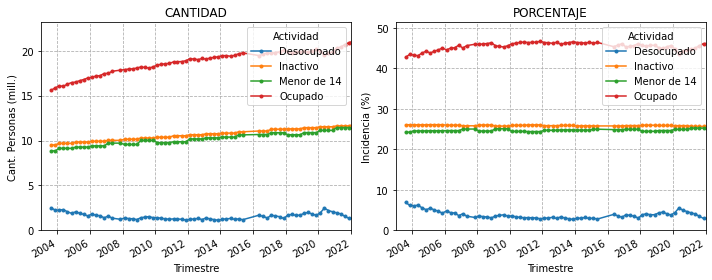

### Cat. Ocupado

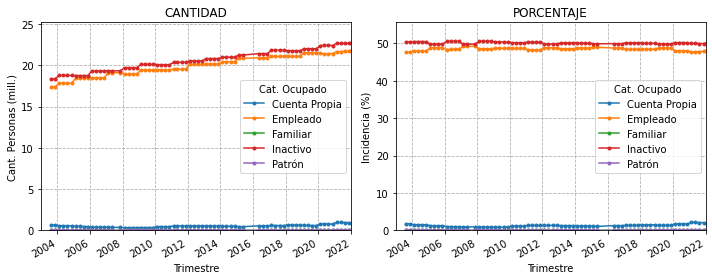

### Cat. Inactivo

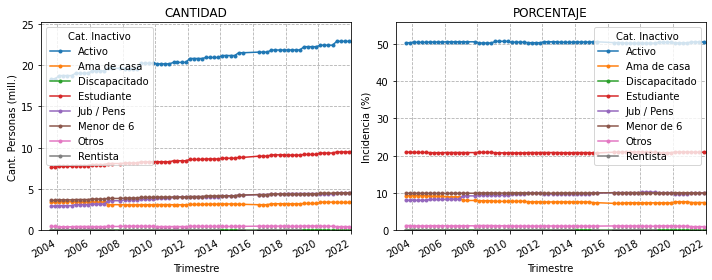

In [20]:
df_

for col in ['Actividad', 'Cat. Ocupado', 'Cat. Inactivo']:
    display(Markdown('### '+col))
    
    fig, axs = plt.subplots(1, 2, figsize = (10, 4))

    table = df_.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)
    
    ax = axs[1]
    ax.set_title('PORCENTAJE')
    table_pct.plot(ax =ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table_pct.max().max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Incidencia (%)')    

    ax = axs[0]
    ax.set_title('CANTIDAD')
    table.plot(ax = ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table.max().max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cant. Personas (mill.)')

    plt.tight_layout()
    plt.savefig('./../images/clasificadores5_'+col.replace(' ', '_')+'.png')
    plt.show()

## Cantidad Personas (2010) Por INGRESO SI/NO

### Total Pais

In [23]:
df_list = []
for f in allFiles:
    print(f)
    groupers = ['AGLOMERADO', 'NOMPROV']
    vars_ = ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
    
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-11-15.csv
/media/mig

In [24]:
data = df10

for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### INGRESO

,Cantidad,Porcentaje
INGRESO,,
0,16531225.0,41.4
1,23439175.0,58.6
TOTAL,39970400.0,100.0


### INGRESO_NLB

,Cantidad,Porcentaje
INGRESO_NLB,,
0,34511725.0,86.3
1,5458675.0,13.7
TOTAL,39970400.0,100.0


### INGRESO_JUB

,Cantidad,Porcentaje
INGRESO_JUB,,
0,35344925.0,88.4
1,4625475.0,11.6
TOTAL,39970400.0,100.0


### INGRESO_SBS

,Cantidad,Porcentaje
INGRESO_SBS,,
0,39574975.0,99.0
1,395425.0,1.0
TOTAL,39970400.0,100.0


### 31 Aglomerados

In [25]:
data = df10.loc[data.AGLO_si == 1]

for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### INGRESO

,Cantidad,Porcentaje
INGRESO,,
0,9897850.0,39.3
1,15317650.0,60.7
TOTAL,25215500.0,100.0


### INGRESO_NLB

,Cantidad,Porcentaje
INGRESO_NLB,,
0,21899250.0,86.8
1,3316250.0,13.2
TOTAL,25215500.0,100.0


### INGRESO_JUB

,Cantidad,Porcentaje
INGRESO_JUB,,
0,22340625.0,88.6
1,2874875.0,11.4
TOTAL,25215500.0,100.0


### INGRESO_SBS

,Cantidad,Porcentaje
INGRESO_SBS,,
0,25049075.0,99.3
1,166425.0,0.7
TOTAL,25215500.0,100.0


## Cantidad de Personas, por Aglomerado

In [26]:
data = df10

for col in ['INGRESO', 'INGRESO_JUB']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMAGLO', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### INGRESO

INGRESO,0,1
NOMAGLO,,
Bahia Blanca,110400.0,176900.0
CABA,806025.0,2069775.0
Catamarca,86575.0,96525.0
Cdro Rivadavia,62625.0,90175.0
Concordia,67900.0,87000.0
Cordoba,583800.0,873700.0
Corrientes,158500.0,192800.0
Formosa,107050.0,118250.0
Fuera de aglom.,6633375.0,8121525.0


### INGRESO_JUB

INGRESO_JUB,0,1
NOMAGLO,,
Bahia Blanca,248000.0,39300.0
CABA,2404675.0,471125.0
Catamarca,169300.0,13800.0
Cdro Rivadavia,139000.0,13800.0
Concordia,138900.0,16000.0
Cordoba,1298175.0,159325.0
Corrientes,320500.0,30800.0
Formosa,205975.0,19325.0
Fuera de aglom.,13004300.0,1750600.0


## Cantidad de Personas, por Provincia

In [27]:
data = df10

for col in ['INGRESO', 'INGRESO_JUB']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMPROV', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### INGRESO

INGRESO,0,1
NOMPROV,,
Buenos Aires,6145200.0,9401500.0
Catamarca,180600.0,193200.0
Chaco,510925.0,549375.0
Chubut,211325.0,281775.0
Ciudad Autónoma de Buenos Aires,806025.0,2070275.0
Corrientes,488150.0,510550.0
Córdoba,1344050.0,1963550.0
Entre Ríos,542725.0,704175.0
Formosa,264275.0,269725.0


### INGRESO_JUB

INGRESO_JUB,0,1
NOMPROV,,
Buenos Aires,13701975.0,1844725.0
Catamarca,339800.0,34000.0
Chaco,962300.0,98000.0
Chubut,450200.0,42900.0
Ciudad Autónoma de Buenos Aires,2405175.0,471125.0
Corrientes,896225.0,102475.0
Córdoba,2895075.0,412525.0
Entre Ríos,1094050.0,152850.0
Formosa,483800.0,50200.0


## Cantidad Personas, Series de Tiempo

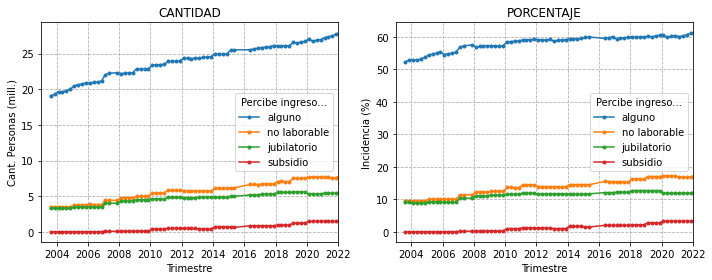

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))


labels = ['alguno', 'no laborable', 'jubilatorio', 'subsidio']
for i, col in enumerate(['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']):
#     display(Markdown('### '+col+'. Personas.'))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)
    
    ax = axs[1]
    ax.set_title('PORCENTAJE')
    ax.plot(table_pct[1], marker = '.', label = labels[i])
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
#     ax.set_ylim(0, table_pct[True].max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Incidencia (%)')    

    ax = axs[0]
    ax.set_title('CANTIDAD')
    ax.plot(table[1], marker = '.', label = labels[i])
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
#     ax.set_ylim(0, table[True].max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cant. Personas (mill.)')

axs[0].legend(title = 'Percibe ingreso...')
axs[1].legend(title = 'Percibe ingreso...')
plt.tight_layout()
plt.savefig('./../images/clasificadores6.png')
plt.show()

## Cantidad Personas (2010) Por Formalidad Laboral

### Total Pais

In [29]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO']
    vars_ = ['PP07K']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'AGLOMERADO'] + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-11-15.csv
/media/mig

In [30]:
data = df10
data = data.merge(PP07K_labels)

for col in ['Cobra con:']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 2)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### Cobra con:

,Cantidad,Porcentaje
Cobra con:,,
N.A.,21801050.0,54.54
factura,2100.0,0.01
nada,4737950.0,11.85
no cobra,200.0,0.00
papel ‘sin nada’,300.0,0.00
recibo con sello,13428800.0,33.60
TOTAL,39970400.0,100.00


### 31 Aglomerados

In [31]:
data = df10.loc[data.AGLO_si == 1]
data = data.merge(PP07K_labels)

for col in ['Cobra con:']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### Cobra con:

,Cantidad,Porcentaje
Cobra con:,,
N.A.,12950275.0,41.7
factura,2100.0,0.0
nada,4737950.0,15.3
no cobra,200.0,0.0
papel ‘sin nada’,200.0,0.0
recibo con sello,13329800.0,43.0
TOTAL,31020525.0,100.0


## Cantidad Personas, Series de Tiempo

In [35]:
table

Cobra con:,N.A.,factura,nada,no cobra,papel ‘sin nada’,recibo con sello
Q,,,,,,
2003-08-15,21.2904,0.0030,3.8818,0.0006,0.0008,11.3050
2003-11-15,21.0352,0.0031,3.9559,0.0006,0.0008,11.4860
2004-02-15,21.3853,0.0010,4.1043,0.0024,0.0001,11.6840
2004-05-15,21.4413,0.0013,4.0892,0.0023,0.0001,11.6429
2004-08-15,21.2119,0.0012,4.1491,0.0024,0.0001,11.8124
...,...,...,...,...,...,...
2021-02-15,25.4155,0.0029,6.2658,0.0011,0.0009,13.6389
2021-05-15,25.3036,0.0025,6.2984,0.0011,0.0009,13.7186
2021-08-15,25.0496,0.0026,6.3852,0.0011,0.0009,13.8857


### Cobra con:

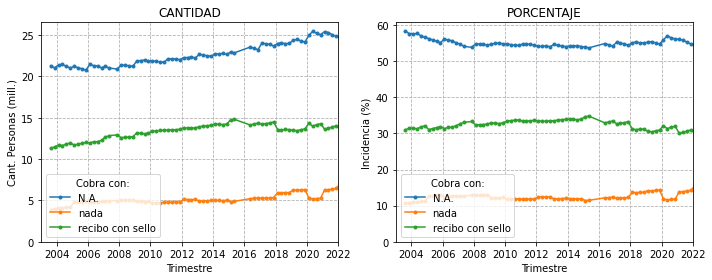

In [61]:
df_ = df.merge(PP07K_labels)

fig, axs = plt.subplots(1, 2, figsize = (10, 4))

for col in ['Cobra con:']:
    display(Markdown('### '+col))

    table = df_.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)
    
    ## keep main categories:
    table = table.T.loc[table.mean() > 1].T
    table_pct = table_pct.T.loc[table_pct.mean() > 1].T

    ax = axs[1]
    ax.set_title('PORCENTAJE')
    ax.plot(table_pct, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, )
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Incidencia (%)')    

    ax = axs[0]
    ax.set_title('CANTIDAD')
    ax.plot(table, marker = '.', label = labels[i])
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, )
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cant. Personas (mill.)')

axs[0].legend(table.columns, title = 'Cobra con:', loc = 'lower left')
axs[1].legend(table.columns, title = 'Cobra con:', loc = 'lower left')
plt.tight_layout()
plt.savefig('./../images/clasificadores7.png')
plt.show()